# cluster_all(T2/T3)

In [1]:
import loompy as lp
import pandas as pd
from pyscenic.binarization import binarize

In [2]:
lf = lp.connect("/syn1/liangzhen/jinhua_jilab_project/result/scRNA/GRN/T2_T3/adatas_SCENIC.loom", mode='r+', validate=False)
auc_mtx = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)
    
cellAnnot = pd.concat(
    [
        pd.DataFrame( lf.ca.CellID, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.cluster, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.nGene, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.nUMI, index=lf.ca.CellID ),
    ],
    axis=1
)
cellAnnot.columns = [
 'Celltype',
 'ClusterID',
 'nGene',
 'nUMI'
]
lf.close()

/tmp/ipykernel_293255/4254205549.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():


In [3]:
auc_mtx

,Arid3a(+),Arnt(+),Atf1(+),Atf2(+),Atf3(+),Atf4(+),Bach2(+),Bcl6(+),Bclaf1(+),Bptf(+),...,Zfp354c(+),Zfp384(+),Zfp398(+),Zfp574(+),Zfp579(+),Zfp639(+),Zfp777(+),Zfp780b(+),Zfx(+),Zscan10(+)
TAGGTACCAACGGCTC-1_T3_a3028_2_1,0.0,0.003848,0.000000,0.000000,0.027996,0.074023,0.001628,0.000000,0.016245,0.002026,...,0.0,0.000000,0.0,0.0,0.066717,0.007087,0.0,0.0,0.009285,0.027660
ACAGGGACAGTCTTCC-1_T2_a3030_1,0.0,0.002269,0.010638,0.000000,0.072788,0.070558,0.008359,0.000000,0.015951,0.002381,...,0.0,0.000000,0.0,0.0,0.009726,0.008036,0.0,0.0,0.008443,0.000000
GTTGTAGTCTCAAAGC-1_T3_a3030_1_1,0.0,0.002198,0.008100,0.000000,0.053611,0.076393,0.005949,0.000000,0.014609,0.003875,...,0.0,0.000000,0.0,0.0,0.032827,0.003005,0.0,0.0,0.008711,0.000000
GAGAAATGTAGGACCA-1_T3_a3030_1_1,0.0,0.047038,0.000000,0.000000,0.080207,0.084529,0.032089,0.044610,0.020832,0.021074,...,0.0,0.000000,0.0,0.0,0.052128,0.006570,0.0,0.0,0.026824,0.035010
CGTCAAAGTGTTCATG-1_T2_a3028_2,0.0,0.009044,0.000919,0.000000,0.013494,0.071827,0.036105,0.000000,0.012576,0.008080,...,0.0,0.000000,0.0,0.0,0.110790,0.005923,0.0,0.0,0.013141,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATTCTTCACAAGTTC-1_T2_a3028_2,0.0,0.007098,0.000000,0.000000,0.086450,0.077284,0.001737,0.000000,0.018791,0.001874,...,0.0,0.000000,0.0,0.0,0.000000,0.009273,0.0,0.0,0.017285,0.000000
CGTCAAATCTGCCTCA-1_T2_a3026_1,0.0,0.015398,0.011098,0.000000,0.076652,0.069417,0.067347,0.020071,0.021947,0.022214,...,0.0,0.000000,0.0,0.0,0.109574,0.003263,0.0,0.0,0.016907,0.012282
CATGGATTCACACCGG-1_T2_a3028_2,0.0,0.052691,0.006310,0.000000,0.034015,0.095652,0.039601,0.046170,0.035687,0.031535,...,0.0,0.000000,0.0,0.0,0.111246,0.007332,0.0,0.0,0.032111,0.037718
GTTTGGATCCCAACTC-1_T2_a3030_1,0.0,0.043988,0.005827,0.000000,0.143869,0.069051,0.040187,0.052766,0.029314,0.006054,...,0.0,0.000000,0.0,0.0,0.046657,0.013542,0.0,0.0,0.028823,0.087137


In [8]:
regulons['Fosb(+)']

['1700016C15Rik',
 '1700018L02Rik',
 '2010300C02Rik',
 '4921511C10Rik',
 '4930563E22Rik',
 'A930004D18Rik',
 'Abcb9',
 'Abtb2',
 'Ace',
 'Anxa1',
 'Aplp2',
 'Atf3',
 'Atxn1l',
 'Awat2',
 'Azin2',
 'Bach2',
 'Baiap2',
 'Bcl2l11',
 'Bhlhe40',
 'Btg2',
 'Cacng5',
 'Cd44',
 'Cdh18',
 'Cdkn2a',
 'Cfap58',
 'Cfh',
 'Chst15',
 'Cldn2',
 'Clic4',
 'Col16a1',
 'Coro2b',
 'Cpeb4',
 'Creb5',
 'Csf2',
 'Csrnp1',
 'Ctsc',
 'Cyb5a',
 'Dleu2',
 'Dusp1',
 'Dusp10',
 'Dysf',
 'Emp1',
 'Ephb3',
 'Ereg',
 'Eya1',
 'F13a1',
 'Fam102b',
 'Fanci',
 'Fmn1',
 'Fmnl1',
 'Fos',
 'Fosb',
 'Gaa',
 'Gabre',
 'Gbp3',
 'Gm11696',
 'Gm12295',
 'Gm17745',
 'H2-M3',
 'Hipk1',
 'Id3',
 'Ier2',
 'Ifi205',
 'Il6ra',
 'Ipmk',
 'Irs2',
 'Itgb5',
 'Itpkb',
 'Jun',
 'Junb',
 'Jund',
 'Klf2',
 'Klf4',
 'Klf6',
 'Lbp',
 'Lpcat4',
 'Magi3',
 'Malat1',
 'Man1a',
 'Man1c1',
 'Map3k2',
 'Mbnl2',
 'Mdga1',
 'Mfsd12',
 'Ms4a4d',
 'Mxd1',
 'Mynn',
 'Ncam1',
 'Neat1',
 'Nfkb1',
 'Nfkbiz',
 'Nuak1',
 'Olfr1420',
 'Osbpl3',
 'P3h2',
 'Pa

In [4]:
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize

In [5]:
rss_cellType = regulon_specificity_scores(auc_mtx,cellAnnot['ClusterID'],)
rss_cellType

,Arid3a(+),Arnt(+),Atf1(+),Atf2(+),Atf3(+),Atf4(+),Bach2(+),Bcl6(+),Bclaf1(+),Bptf(+),...,Zfp354c(+),Zfp384(+),Zfp398(+),Zfp574(+),Zfp579(+),Zfp639(+),Zfp777(+),Zfp780b(+),Zfx(+),Zscan10(+)
2,0.167445,0.278609,0.271929,0.178357,0.300502,0.341023,0.274043,0.237898,0.332086,0.299148,...,0.167445,0.188861,0.168681,0.171505,0.290727,0.331831,0.169331,0.179950,0.314170,0.321490
3,0.168227,0.373657,0.263068,0.195707,0.361799,0.337483,0.433336,0.300407,0.340348,0.380282,...,0.173215,0.225633,0.197992,0.175113,0.408306,0.300539,0.175468,0.188657,0.346741,0.388359
1,0.169407,0.395791,0.376148,0.235731,0.350647,0.374675,0.301873,0.319698,0.365256,0.343885,...,0.176118,0.211185,0.179336,0.236833,0.258927,0.378594,0.178483,0.182694,0.402985,0.238119
4,0.168578,0.269465,0.369357,0.182697,0.330942,0.338460,0.275817,0.238655,0.358317,0.252857,...,0.172921,0.187757,0.173940,0.169272,0.310392,0.306998,0.171060,0.184749,0.299752,0.266143
5,0.169306,0.347064,0.294498,0.189284,0.355282,0.353975,0.368463,0.299583,0.331477,0.327218,...,0.178118,0.207079,0.198907,0.190209,0.313039,0.322811,0.172206,0.176315,0.350606,0.273922


In [6]:
rss_cellType.columns.to_list()

['Arid3a(+)',
 'Arnt(+)',
 'Atf1(+)',
 'Atf2(+)',
 'Atf3(+)',
 'Atf4(+)',
 'Bach2(+)',
 'Bcl6(+)',
 'Bclaf1(+)',
 'Bptf(+)',
 'Cebpa(+)',
 'Cebpb(+)',
 'Cebpd(+)',
 'Chd1(+)',
 'Chd2(+)',
 'Clock(+)',
 'Crem(+)',
 'Cux1(+)',
 'Dbp(+)',
 'Ddit3(+)',
 'Dlx3(+)',
 'E2f1(+)',
 'E2f7(+)',
 'E2f8(+)',
 'Egr1(+)',
 'Elf1(+)',
 'Elf2(+)',
 'Elk1(+)',
 'Elk4(+)',
 'Ep300(+)',
 'Erf(+)',
 'Esrrb(+)',
 'Etv4(+)',
 'Etv5(+)',
 'Fos(+)',
 'Fosb(+)',
 'Fosl1(+)',
 'Fosl2(+)',
 'Foxa2(+)',
 'Foxc1(+)',
 'Foxg1(+)',
 'Foxm1(+)',
 'Foxn2(+)',
 'Gabpa(+)',
 'Gata2(+)',
 'Gata3(+)',
 'Gata4(+)',
 'Gata6(+)',
 'Gli3(+)',
 'Grhl2(+)',
 'Gtf3a(+)',
 'Hcfc1(+)',
 'Hes6(+)',
 'Hivep1(+)',
 'Hmbox1(+)',
 'Hoxc13(+)',
 'Ikzf2(+)',
 'Ilf2(+)',
 'Irf1(+)',
 'Irf2(+)',
 'Irf3(+)',
 'Irf5(+)',
 'Irf7(+)',
 'Irf8(+)',
 'Irf9(+)',
 'Jun(+)',
 'Junb(+)',
 'Jund(+)',
 'Klf6(+)',
 'Klf7(+)',
 'Lcorl(+)',
 'Lef1(+)',
 'Lhx8(+)',
 'Mafb(+)',
 'Max(+)',
 'Meis1(+)',
 'Mlx(+)',
 'Mxd4(+)',
 'Mxi1(+)',
 'Mybl1(+)',
 'Mybl2(+

In [17]:
import numpy as np

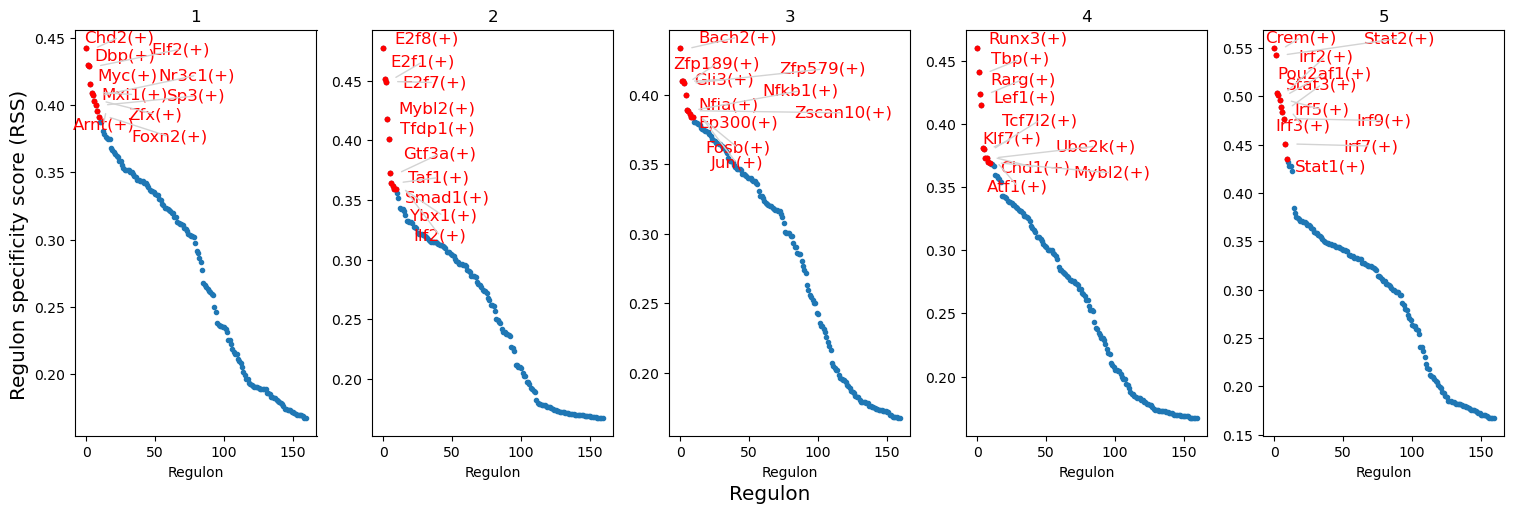

In [22]:
cats = sorted(list(set(cellAnnot['ClusterID'])))

fig = plt.figure(figsize=(15, 5))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(15, 5)
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(1,5,num)
    plot_rss(rss_cellType, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xticks(np.arange(0, len(x), 50))
    ax.set_xticklabels(np.arange(0, len(x), 50), fontsize=10)
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3.sup/sc_GRN_T23.pdf", dpi=600, bbox_inches = "tight")
plt.show()

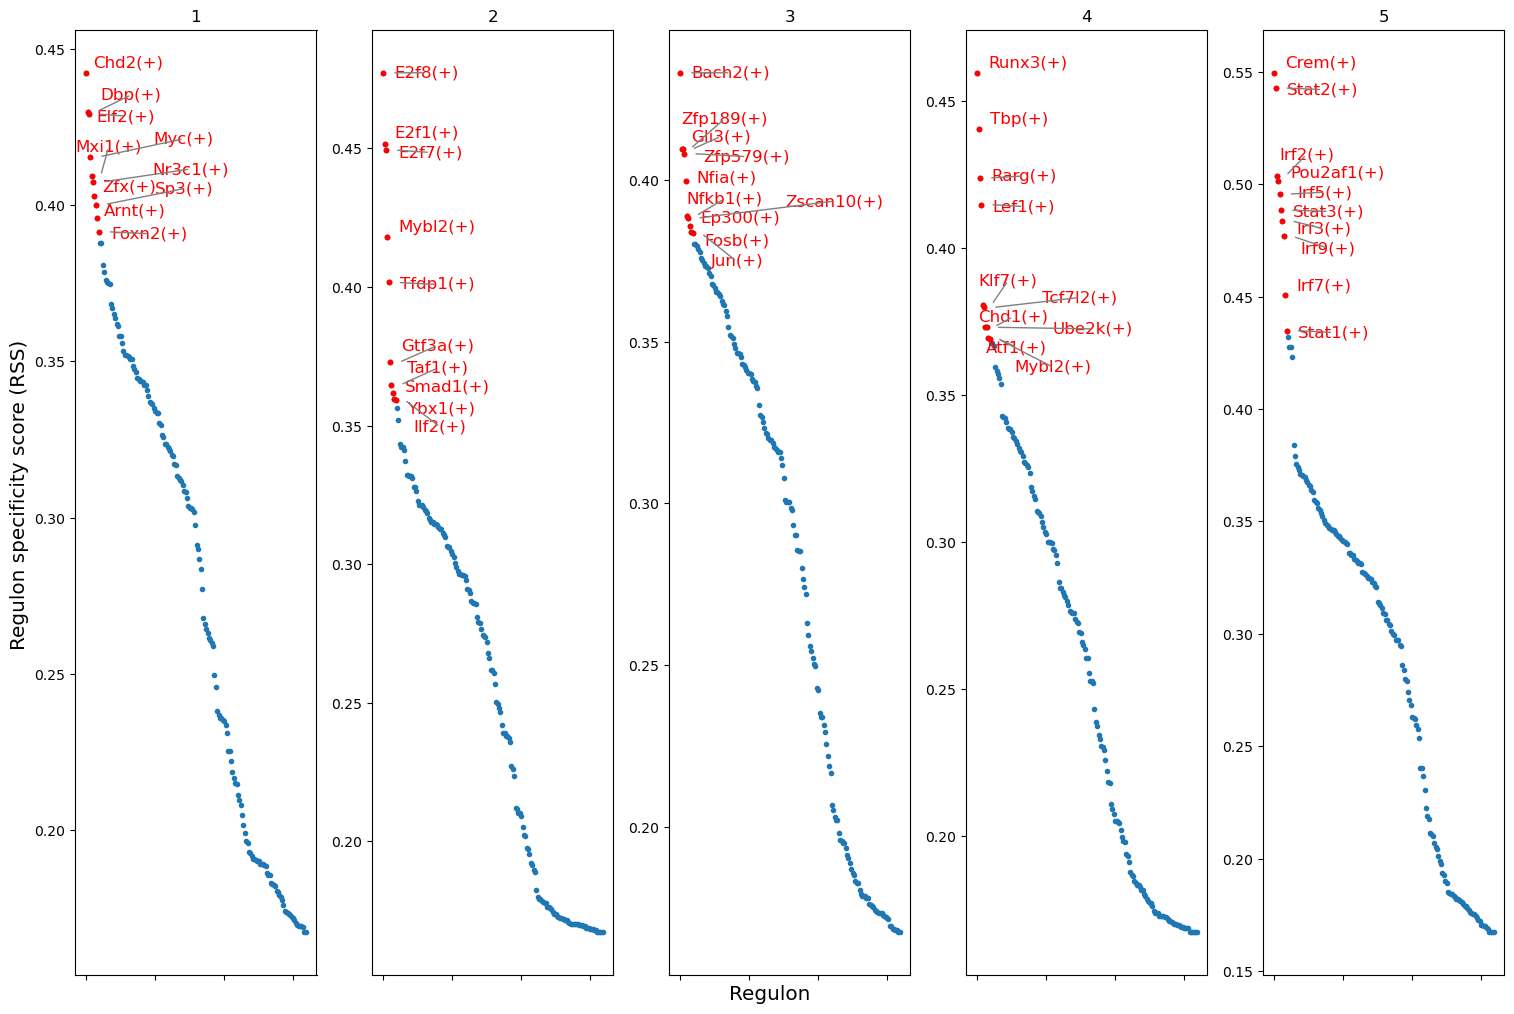

In [21]:
cats = sorted(list(set(cellAnnot['ClusterID'])))

fig = plt.figure(figsize=(15, 10))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(15, 10)
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(1,5,num)
    plot_rss(rss_cellType, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='gray'), precision=0.00001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.show()

In [22]:
rss_cellType

,Arid3a(+),Arnt(+),Atf1(+),Atf2(+),Atf3(+),Atf4(+),Bach2(+),Bcl6(+),Bclaf1(+),Bptf(+),...,Zfp354c(+),Zfp384(+),Zfp398(+),Zfp574(+),Zfp579(+),Zfp639(+),Zfp777(+),Zfp780b(+),Zfx(+),Zscan10(+)
2,0.167445,0.278609,0.271929,0.178357,0.300502,0.341023,0.274043,0.237898,0.332086,0.299148,...,0.167445,0.188861,0.168681,0.171505,0.290727,0.331831,0.169331,0.179950,0.314170,0.321490
3,0.168227,0.373657,0.263068,0.195707,0.361799,0.337483,0.433336,0.300407,0.340348,0.380282,...,0.173215,0.225633,0.197992,0.175113,0.408306,0.300539,0.175468,0.188657,0.346741,0.388359
1,0.169407,0.395791,0.376148,0.235731,0.350647,0.374675,0.301873,0.319698,0.365256,0.343885,...,0.176118,0.211185,0.179336,0.236833,0.258927,0.378594,0.178483,0.182694,0.402985,0.238119
4,0.168578,0.269465,0.369357,0.182697,0.330942,0.338460,0.275817,0.238655,0.358317,0.252857,...,0.172921,0.187757,0.173940,0.169272,0.310392,0.306998,0.171060,0.184749,0.299752,0.266143
5,0.169306,0.347064,0.294498,0.189284,0.355282,0.353975,0.368463,0.299583,0.331477,0.327218,...,0.178118,0.207079,0.198907,0.190209,0.313039,0.322811,0.172206,0.176315,0.350606,0.273922


In [23]:
rss_cellType.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3.sup/rss_cellType_EE_LE.csv')

# cluster_all(T1)

In [23]:
import loompy as lp
import pandas as pd
from pyscenic.binarization import binarize

In [24]:
lf = lp.connect("/syn1/liangzhen/jinhua_jilab_project/result/scRNA/GRN/T1/adatas_SCENIC.loom", mode='r+', validate=False)
auc_mtx = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)
    
cellAnnot = pd.concat(
    [
        pd.DataFrame( lf.ca.CellID, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.cluster, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.nGene, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.nUMI, index=lf.ca.CellID ),
    ],
    axis=1
)
cellAnnot.columns = [
 'Celltype',
 'ClusterID',
 'nGene',
 'nUMI'
]
lf.close()

/tmp/ipykernel_72653/1097646787.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():


In [25]:
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize

In [27]:
rss_cellType = regulon_specificity_scores(auc_mtx,cellAnnot['ClusterID'],)
rss_cellType

,Arid3a(+),Arnt(+),Atf1(+),Atf3(+),Atf4(+),Atf7(+),Bach2(+),Bclaf1(+),Bhlhe40(+),Bhlhe41(+),...,Zfp560(+),Zfp580(+),Zfp595(+),Zfp639(+),Zfp652(+),Zfp704(+),Zfp787(+),Zfp791(+),Zfx(+),Zscan2(+)
2,0.185541,0.315988,0.373021,0.351705,0.373059,0.175573,0.270819,0.373192,0.317805,0.183879,...,0.176139,0.191121,0.184645,0.333257,0.290590,0.354622,0.282849,0.184185,0.355641,0.200316
3,0.197144,0.384485,0.369889,0.395784,0.362625,0.208639,0.451952,0.362524,0.359872,0.203744,...,0.185248,0.213095,0.199787,0.279262,0.311052,0.390225,0.354200,0.216537,0.377750,0.225415
1,0.196329,0.417612,0.385851,0.393077,0.405689,0.188086,0.329867,0.389089,0.370617,0.214500,...,0.245138,0.233706,0.230859,0.344282,0.344922,0.375881,0.400236,0.202367,0.420747,0.266363
4,0.282421,0.338001,0.391258,0.365236,0.377049,0.182304,0.264999,0.379348,0.338570,0.182833,...,0.198506,0.182539,0.201061,0.338650,0.273940,0.369234,0.373581,0.194386,0.345061,0.264459
5,0.186115,0.189647,0.194470,0.196441,0.193377,0.178114,0.195356,0.191426,0.193095,0.180793,...,0.171141,0.176570,0.184547,0.178377,0.186111,0.194272,0.194502,0.167445,0.191048,0.174668


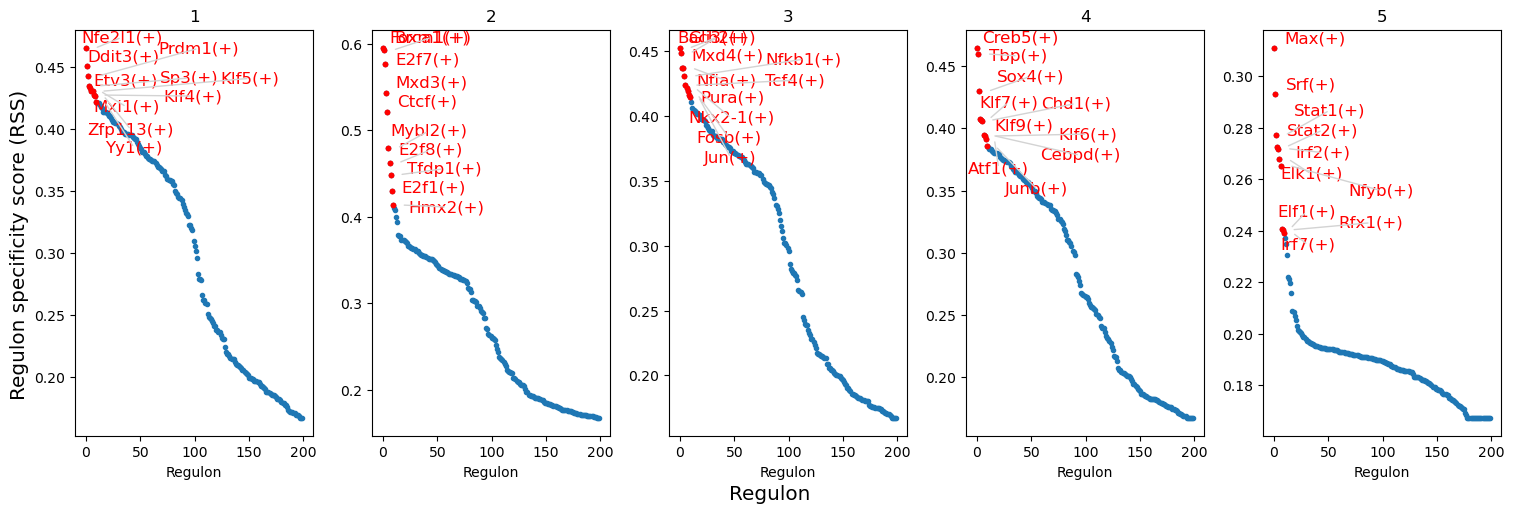

In [30]:
cats = sorted(list(set(cellAnnot['ClusterID'])))

fig = plt.figure(figsize=(15, 5))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(15, 5)
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(1,5,num)
    plot_rss(rss_cellType, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xticks(np.arange(0, len(x)+1, 50))
    ax.set_xticklabels(np.arange(0, len(x)+1, 50), fontsize=10)
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3.sup/sc_GRN_T1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

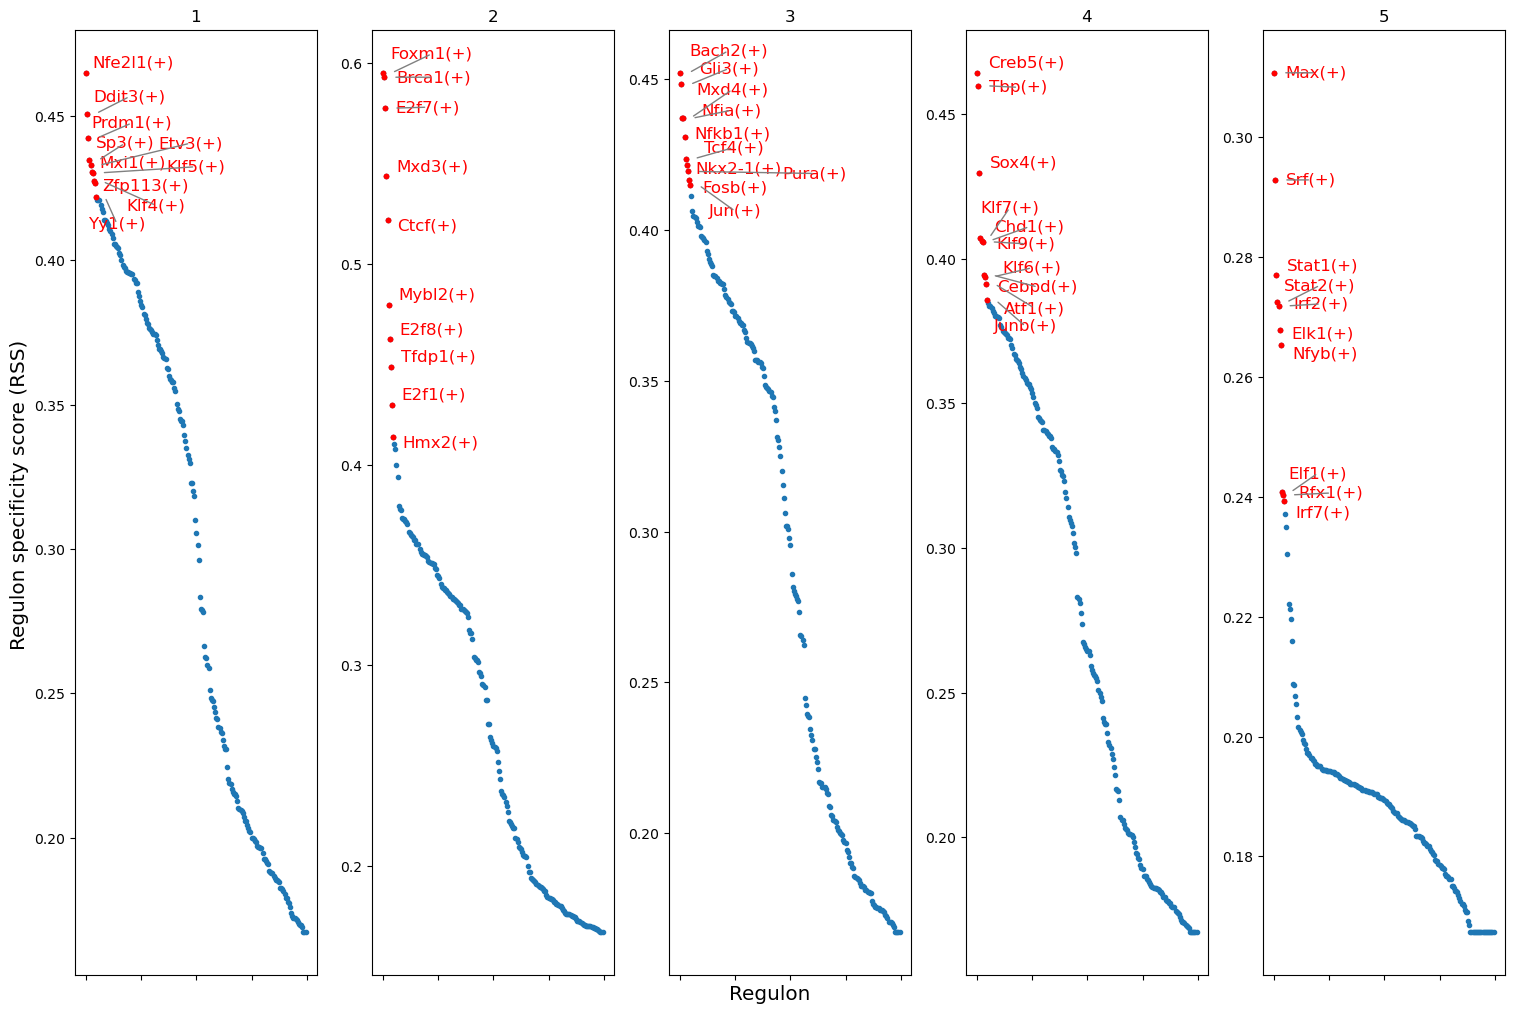

In [13]:
cats = sorted(list(set(cellAnnot['ClusterID'])))

fig = plt.figure(figsize=(15, 10))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(15, 10)
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(1,5,num)
    plot_rss(rss_cellType, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='gray'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.show()